# ZindiWeekendz Learning: Urban Air Pollution Challenge by #ZindiWeekendz

File name: AirAI_in_R.ipynb

Author: kogni7

Date: April 2022 / March 2023

## Contents
* 1 Preparation
* 2 Data
* 3 Training
* 4 Prediction and Submission

This notebook uses only the data sets provided by ZINDI. These data sets contain information about the air quality. These are the only used features in this notebook. The task is to predict the air pollution.

The file system for this project is:
* AirAI_in_R (root)
  * AirAI_in_R.ipynb (this notebook)
  * Data  
  * Submission
    * 1 - x: Submission directories named by the version number
      * submission.csv

This notebook uses a deep learning approach.

## 1 Preparation

In [1]:
start_time <- Sys.time()

# R Version
print(R.version.string)

# Libraries
library(caret)
library(RANN)
library(keras)
library(reticulate)

# Seed
SEED = 42
set.seed(SEED);

use_virtualenv("~/.virtualenvs/r-reticulate")

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"


Lade nötiges Paket: ggplot2

Lade nötiges Paket: lattice



### Parameters

In [2]:
VERSION = "VERSION_R_1"
CV = 5
HIDDEN = 100
DROPOUT = 0.0
BATCH = 32
EPOCHS = 15
LEARNING_RATE = 0.001

## 2 Data

In [3]:
train = read.csv2("Data/Train.csv", header = TRUE, sep = ",", dec = ".", fill = TRUE)
head(train)

,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.000000,60.2,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.600000,48.8,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,010Q650 X 2020-01-04,2020-01-04,010Q650,24,8,56,1181.96,96,16.400000,33.4,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,010Q650 X 2020-01-05,2020-01-05,010Q650,49,10,55,1113.67,96,6.911948,21.3,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,010Q650 X 2020-01-06,2020-01-06,010Q650,21,9,52,1164.82,95,13.900001,44.7,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,010Q650 X 2020-01-07,2020-01-07,010Q650,28,10,52,1053.22,94,14.600000,42.2,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


In [4]:
test = read.csv2("Data/Test.csv", header = TRUE, sep = ",", dec = ".", fill = TRUE)
head(test)

,Place_ID.X.Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,0OS9LVX X 2020-01-07,2020-01-07,0OS9LVX,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


In [5]:
samplesubmission = read.csv2("Data/SampleSubmission.csv", header = TRUE, sep = ",", dec = ".", fill = TRUE)
head(samplesubmission)

,Place_ID.X.Date,target
,<chr>,<int>
1,0OS9LVX X 2020-01-02,0
2,0OS9LVX X 2020-01-03,0
3,0OS9LVX X 2020-01-04,0
4,0OS9LVX X 2020-01-05,0
5,0OS9LVX X 2020-01-06,0
6,0OS9LVX X 2020-01-07,0


### Label encoding

In [6]:
train$Date = as.numeric(factor(train$Date))
train$Place_ID = as.numeric(factor(train$Place_ID))

test$Date = as.numeric(factor(test$Date))
test$Place_ID = as.numeric(factor(test$Place_ID))

In [7]:
y_train = as.matrix(train$target)

train$target = NULL
train$target_min = NULL
train$target_max = NULL
train$target_variance = NULL
train$target_count = NULL

head(train[, 2:ncol(train)])

,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,2,1,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,3,1,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,4,1,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,8.258178e-05,0.0001748593,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,5,1,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,7.038484e-05,0.0001415511,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,6,1,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,6.866629e-05,0.0001455166,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


### Imputing and Scaling

In [8]:
values = preProcess(train[, 2:ncol(train)], method = c('knnImpute', 'scale', 'center'))
train_scaled = predict(values, train[, 2:ncol(train)])
X_train = as.matrix(train_scaled)
head(X_train)

Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
-1.713559,-1.729979,-0.40251639,-0.5504471,0.53750262,0.9841888,0.5832705,-0.4980767,-0.2172832,-0.06960629,⋯,0.1583786,0.8613544,-1.6561493,0.9364563,0.8706498,-0.20904427,1.32894163,1.3137063,0.08212234,-0.02241199
-1.676693,-1.729979,-0.06570805,-1.1565760,0.62991865,1.4154846,1.0759062,-0.4832061,-0.1938101,0.30861530,⋯,1.2679349,0.7787452,-1.2278209,0.9323331,0.9604512,-0.04154065,1.34979405,2.3221271,0.17981154,-0.15359172
-1.639828,-1.729979,0.10269603,-1.9753814,0.39491805,1.8954577,1.7167127,1.2915109,-0.2942676,0.06490518,⋯,0.7517081,0.6306671,-0.8384781,-0.6067773,-0.5882592,-0.47448752,-0.39611073,-0.2913118,0.67917093,-0.61862280
-1.602962,-1.729979,-0.78498582,-2.6187286,-0.55300540,1.5680361,0.9553636,0.3826688,-0.1240037,0.10583007,⋯,-0.3381472,0.6924907,-1.0955332,0.5585970,0.5366922,-0.14130237,-1.49649141,0.3701075,0.20274542,0.06627521
-1.566096,-1.729979,-0.13119854,-1.3745696,-0.17277988,0.8021820,0.8142205,0.9773458,-0.2540085,-0.20109093,⋯,-1.8355686,0.7659668,-1.3453403,-0.9931134,-0.9830554,-0.60062287,-0.02277087,-0.7692042,0.81578127,-0.93198999
-1.529230,-1.729979,-0.06570805,-1.5074926,-0.03770471,1.0546196,0.9374911,0.3333135,-0.2723262,-0.16455073,⋯,-0.2630272,0.8560471,-1.5837698,-0.6066535,-0.6146576,-0.46100294,0.24457736,-0.4833405,0.65534320,-0.74861539


In [9]:
values = preProcess(test[, 2:ncol(test)], method = c('knnImpute', 'scale', 'center'))
test_scaled = predict(values, test[, 2:ncol(test)])
X_test = as.matrix(test_scaled)
head(X_test)

Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
-1.723312,-1.720798,-0.27749381,-2.22994512,-0.4364016,0.7475267,1.1545861,0.2054204,-0.5349458,-0.5768441,⋯,-1.77836245,0.3541579,-1.890464,0.1651398,0.01191633,0.2839866,0.4051754,-0.5717609,0.38202007,-0.356867161
-1.686432,-1.720798,0.43701595,-1.53813133,0.1340325,0.7935511,1.2505976,0.1880225,-0.5699308,-0.5678219,⋯,-0.01342089,0.3668788,-2.209288,0.1740907,0.15687901,1.2401634,0.7832587,0.6056657,0.26606957,-0.566078436
-1.649551,-1.720798,0.36236560,-1.62528910,0.1186983,0.8538634,1.6062964,0.5237695,-0.5710489,-0.3160859,⋯,1.11534495,0.3799855,-2.527778,0.5659608,0.54377955,1.8810922,1.0480317,1.2690047,0.17721344,-0.408785339
-1.612671,-1.720798,0.08636728,-0.98250136,0.4836536,0.7207669,1.6792629,-0.1044149,-0.5157541,-0.1159092,⋯,1.29089816,0.3376007,-1.181654,0.9695848,0.72838236,2.1392245,-1.8126613,2.2879662,-0.05205319,0.360041781
-1.575790,-1.720798,-0.48011603,0.02525861,0.7872719,0.4038844,0.9988288,-0.1349164,-0.5146960,-0.3518712,⋯,0.32068750,0.3532100,-1.500994,0.9524651,0.83323465,0.4341072,-1.8075611,1.5367812,-0.28174970,0.174699546
-1.538910,-1.720798,-0.08553597,-0.10003024,0.8490872,0.5095182,1.1508116,-0.1217030,-0.4787264,-0.5174597,⋯,-1.27905310,0.3697017,-1.820525,0.9594666,0.69971269,0.1142440,-1.7565099,-0.1258437,-0.26541203,-0.003093347


## 3 Training

In [10]:
return_model <- function(HIDDEN, DROPOUT) {
    model <- keras_model_sequential()

    model %>% 
      layer_dense(units = HIDDEN, activation = 'relu', input_shape = c(76)) %>% 
      layer_dropout(rate = DROPOUT) %>% 
      layer_dense(units = HIDDEN, activation = 'relu') %>%
      layer_dropout(rate = DROPOUT) %>%
      layer_dense(units = 1, activation = 'relu')

    return(model)
}


training <- function(features, labels, VERSION, CV, HIDDEN, DROPOUT, BATCH, EPOCHS, LEARNING_RATE) {
    # This function is a cross-validated training.
    #writeLines("Cross-Validated Training is starting...")

    TRAIN_LOSSES = matrix(0, EPOCHS, CV)
    VAL_LOSSES = matrix(0, EPOCHS, CV)

    folds = createFolds(labels, k=CV, list=FALSE)

    for (i in 1:CV) {
        #writeLines(sprintf("Fold: %s", i))

        # Data
        X_train_now = features[which(folds != i), ]
        X_val_now = features[which(folds == i), ]
        y_train_now = labels[which(folds != i), ]
        y_val_now = labels[which(folds == i), ]

        # Model
        model = return_model(HIDDEN, DROPOUT)
        #summary(model)
        model %>% compile(loss ='mean_squared_error', optimizer = optimizer_adam(learning_rate = LEARNING_RATE))

        history = model %>% fit(X_train_now, y_train_now,
                                batch_size = BATCH,
                                epochs = EPOCHS,
                                validation_data = list(X_val_now, y_val_now))

        save_model_hdf5(model, paste0("model_", i, ".h5"))
        rm(model)

        TRAIN_LOSSES[, i] = sqrt(history$metrics$loss)
        VAL_LOSSES[, i] = sqrt(history$metrics$val_loss)
    }

    writeLines("\n")
    writeLines("Epoch \t TRAINING \t \t VALIDATION")
    writeLines("===================================================")
    for (i in 1:nrow(TRAIN_LOSSES)) {
        writeLines(sprintf("%s: \t %s (SD: %s) \t %s (SD: %s)", i, round(mean(TRAIN_LOSSES[i, ]), 3), round(sd(TRAIN_LOSSES[i, ]), 3), round(mean(VAL_LOSSES[i, ]), 3), round(sd(VAL_LOSSES[i, ]), 3)))
    }

    plot(TRAIN_LOSSES[, 1], type = "b", main = "TRAINING", xlab = "EPOCHS", ylab = "LOSS", ylim = c(25, 50))

    for (i in 2:CV-1) {
      lines(TRAIN_LOSSES[, i], type = "b")
    }

    plot(VAL_LOSSES[, 1], type = "b", main = "VALIDATION", xlab = "EPOCHS", ylab = "LOSS", ylim = c(25, 50))

    for (i in 2:CV-1) {
        lines(VAL_LOSSES[, i], type = "b")
    }
}



Epoch 	 TRAINING 	 	 VALIDATION
1: 	 41.239 (SD: 0.671) 	 36.709 (SD: 1.265)
2: 	 36.258 (SD: 0.356) 	 36.021 (SD: 1.242)
3: 	 35.776 (SD: 0.381) 	 35.672 (SD: 1.279)
4: 	 35.369 (SD: 0.376) 	 35.324 (SD: 1.221)
5: 	 34.747 (SD: 0.425) 	 34.877 (SD: 1.461)
6: 	 34.137 (SD: 0.397) 	 34.333 (SD: 1.293)
7: 	 33.641 (SD: 0.427) 	 33.886 (SD: 1.302)
8: 	 33.204 (SD: 0.424) 	 33.584 (SD: 1.434)
9: 	 32.828 (SD: 0.41) 	 33.434 (SD: 1.4)
10: 	 32.498 (SD: 0.404) 	 33.344 (SD: 1.406)
11: 	 32.189 (SD: 0.393) 	 33.187 (SD: 1.434)
12: 	 31.882 (SD: 0.383) 	 32.888 (SD: 1.537)
13: 	 31.579 (SD: 0.346) 	 32.926 (SD: 1.543)
14: 	 31.325 (SD: 0.346) 	 32.483 (SD: 1.418)
15: 	 31.055 (SD: 0.332) 	 32.53 (SD: 1.539)


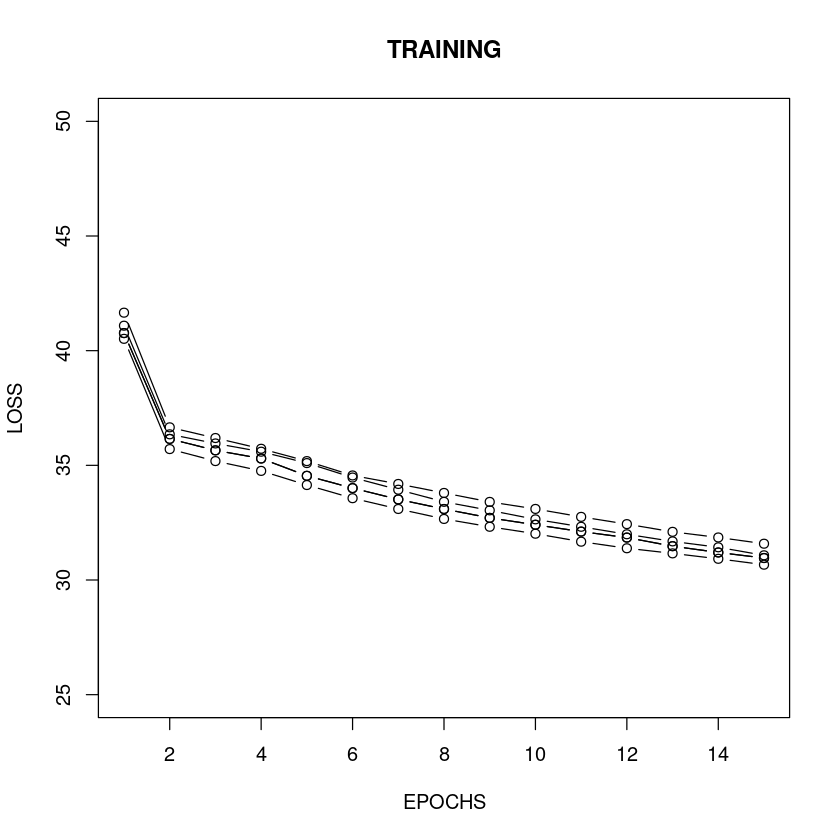

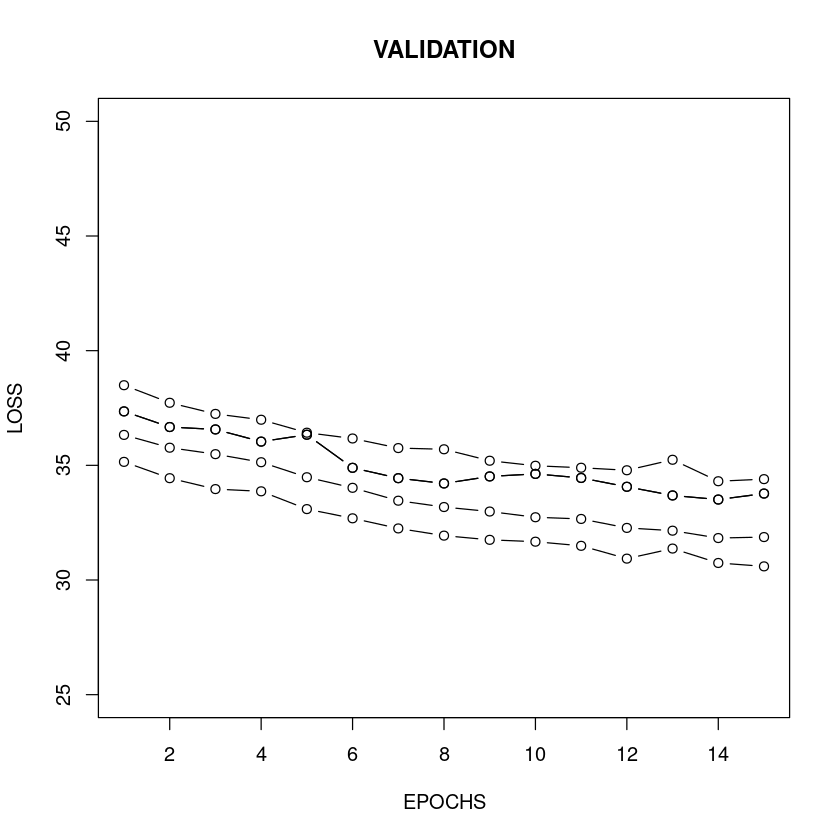

In [11]:
training(X_train, y_train, VERSION, CV, HIDDEN, DROPOUT, BATCH, EPOCHS, LEARNING_RATE)

## 4 Prediction and Submission

In [12]:
dir.create(file.path("Submission/", VERSION), showWarnings = FALSE)

In [13]:
predicting <- function(CV) {
    predictions = matrix(0, nrow(X_test))

    for (i in 1:CV) {
        model = load_model_hdf5(paste0("model_", i, ".h5"))
        file.remove(paste0("model_", i, ".h5"))
        pred = predict(model, X_test)
        predictions = predictions + pred
    }
    predictions = predictions / CV
    
    return(predictions)
}

samplesubmission$target = predicting(CV)

write.csv(samplesubmission, paste0("Submission/", VERSION, "/submission.csv"), row.names = FALSE, quote = FALSE)

In [14]:
end_time <- Sys.time()
round(end_time - start_time, 1)

Time difference of 6.4 mins